# Flight Delay Prediction

## Flight Data Processing

- Exploring <strong>2016_1.csv</strong> flight Data to generalize
- Loading only the required columns
- Filtering and retaining only the flights (rows) originating from and destined to the required airports
- Visualizing the missing data
- Removing the rows that have missing data in their columns
- Combining all the flight data after data handling into a df
- Storing df as <strong>flight_data.csv</strong> in the <strong>Data</strong> directory

## Prerequisites

In [1]:
# Loading the required modules
import pandas as pd
import os
import missingno as msno
%matplotlib inline

# Processing the data only for the airports mentioned below
airports = ('ATL','CLT','DEN','DFW','EWR','IAH','JFK','LAS','LAX','MCO','MIA','ORD','PHX','SEA','SFO')
fields = ("Year",
          "Quarter",
          "Month",
          "DayofMonth",
          "FlightDate",
          "OriginAirportID",
          "Origin",
          "DestAirportID",
          "Dest",
          "CRSDepTime",
          "DepTime",
          "DepDelayMinutes",
          "DepDel15",
          "CRSArrTime",
          "ArrTime",
          "ArrDelayMinutes",
          "ArrDel15")

## Exploratory Data Analysis

### Extracting Required Columns and Flight Data Handling

In [2]:
# Loading only the selected columns
df = pd.read_csv("Data/Flight_Data/2016_1.csv", usecols=fields)
# Filtering out rows with valid origin and destination airports
df = df[df["Origin"].isin(airports)]
df = df[df["Dest"].isin(airports)]

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75010 entries, 57 to 445817
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             75010 non-null  int64  
 1   Quarter          75010 non-null  int64  
 2   Month            75010 non-null  int64  
 3   DayofMonth       75010 non-null  int64  
 4   FlightDate       75010 non-null  object 
 5   OriginAirportID  75010 non-null  int64  
 6   Origin           75010 non-null  object 
 7   DestAirportID    75010 non-null  int64  
 8   Dest             75010 non-null  object 
 9   CRSDepTime       75010 non-null  int64  
 10  DepTime          73195 non-null  float64
 11  DepDelayMinutes  73195 non-null  float64
 12  DepDel15         73195 non-null  float64
 13  CRSArrTime       75010 non-null  int64  
 14  ArrTime          73161 non-null  float64
 15  ArrDelayMinutes  73073 non-null  float64
 16  ArrDel15         73073 non-null  float64
dtypes: float64

### Visualizing Missing Data
- White lines indicate missing values
- There is an <strong>interesting trend</strong> in the columns that have missing values
- They mostly have missing values in common rows namely: 
    - <strong>DepTime, DepDelayMinutes and, DepDel15</strong>
    - <strong>ArrTime, ArrDelayMinutes and, ArrDel15</strong>

AxesSubplot(0.125,0.125;0.698618x0.755)


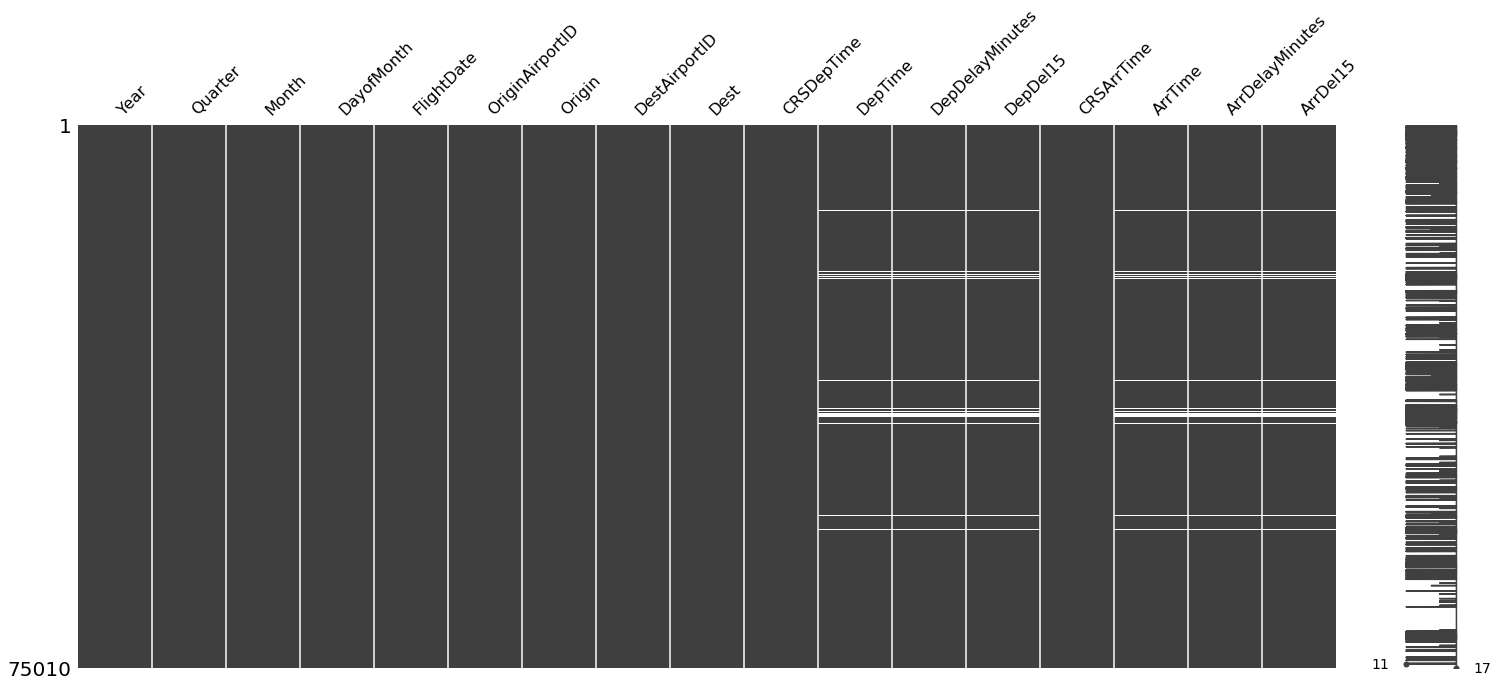

In [3]:
print(msno.matrix(df))

In [4]:
print(df.isnull().sum())

Year                  0
Quarter               0
Month                 0
DayofMonth            0
FlightDate            0
OriginAirportID       0
Origin                0
DestAirportID         0
Dest                  0
CRSDepTime            0
DepTime            1815
DepDelayMinutes    1815
DepDel15           1815
CRSArrTime            0
ArrTime            1849
ArrDelayMinutes    1937
ArrDel15           1937
dtype: int64


### Handling Missing Data

Year               0
Quarter            0
Month              0
DayofMonth         0
FlightDate         0
OriginAirportID    0
Origin             0
DestAirportID      0
Dest               0
CRSDepTime         0
DepTime            0
DepDelayMinutes    0
DepDel15           0
CRSArrTime         0
ArrTime            0
ArrDelayMinutes    0
ArrDel15           0
dtype: int64
AxesSubplot(0.125,0.125;0.698618x0.755)


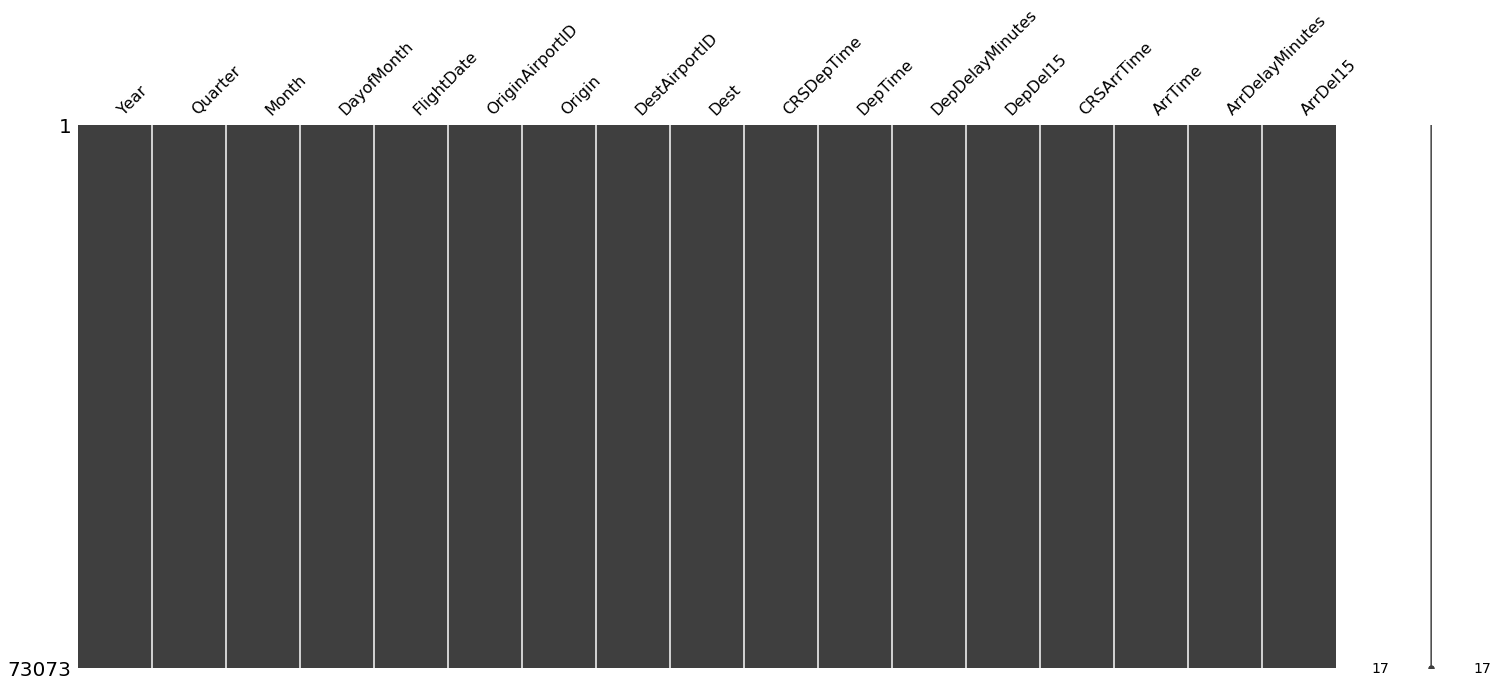

In [5]:
df = df.dropna(how="any", axis=0)
print(df.isnull().sum())
print(msno.matrix(df))

## Loading Flight Data

In [6]:
# Loading all the csv files from the Data dir into a list with their relative path names
flight_data_path = "Data/Flight_Data"
flight_data_files = [os.path.join(flight_data_path, f) for f in os.listdir(flight_data_path)]
flight_data_files
flight_data = list()
# Iterating over the generated list and performing data handling
for file in flight_data_files:
    df = pd.read_csv(file, usecols=fields)
    df = df[df["Origin"].isin(airports)]
    df = df[df["Dest"].isin(airports)]
    df = df.dropna(how="any", axis=0)
    flight_data.append(df)
    print(file)

Data/Flight_Data/2017_10.csv
Data/Flight_Data/2017_7.csv
Data/Flight_Data/2016_4.csv
Data/Flight_Data/2017_3.csv
Data/Flight_Data/2016_7.csv
Data/Flight_Data/2016_6.csv
Data/Flight_Data/2016_10.csv
Data/Flight_Data/2017_9.csv
Data/Flight_Data/2016_9.csv
Data/Flight_Data/2016_5.csv
Data/Flight_Data/2016_11.csv
Data/Flight_Data/2017_4.csv
Data/Flight_Data/2016_8.csv
Data/Flight_Data/2016_3.csv
Data/Flight_Data/2017_11.csv
Data/Flight_Data/2016_1.csv
Data/Flight_Data/2017_12.csv
Data/Flight_Data/2017_2.csv
Data/Flight_Data/2017_1.csv
Data/Flight_Data/2016_12.csv
Data/Flight_Data/2017_5.csv
Data/Flight_Data/2017_6.csv
Data/Flight_Data/2017_8.csv
Data/Flight_Data/2016_2.csv


## Combining all the Flight Data

In [7]:
# Concatenating the list of flight Data Frames
flight_data_df = pd.concat(flight_data)
print(flight_data_df.info())
# Storing the combined data as a csv file
flight_data_df.to_csv("Data/flight_data.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851436 entries, 3 to 423884
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Quarter          int64  
 2   Month            int64  
 3   DayofMonth       int64  
 4   FlightDate       object 
 5   OriginAirportID  int64  
 6   Origin           object 
 7   DestAirportID    int64  
 8   Dest             object 
 9   CRSDepTime       int64  
 10  DepTime          float64
 11  DepDelayMinutes  float64
 12  DepDel15         float64
 13  CRSArrTime       int64  
 14  ArrTime          float64
 15  ArrDelayMinutes  float64
 16  ArrDel15         float64
dtypes: float64(6), int64(8), object(3)
memory usage: 254.3+ MB
None


In [8]:
# print(msno.matrix(flight_data_df))
# print(flight_data_df.isnull().sum())

In [9]:
flight_data_df.head()

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
3,2017,4,10,6,2017-10-06,11618,EWR,13930,ORD,2010,2002.0,0.0,0.0,2132,2123.0,0.0,0.0
11,2017,4,10,6,2017-10-06,12266,IAH,13930,ORD,1450,1509.0,19.0,1.0,1735,1731.0,0.0,0.0
15,2017,4,10,6,2017-10-06,11618,EWR,12266,IAH,2025,2023.0,0.0,0.0,2304,2241.0,0.0,0.0
16,2017,4,10,6,2017-10-06,14771,SFO,11618,EWR,52,43.0,0.0,0.0,919,835.0,0.0,0.0
22,2017,4,10,6,2017-10-06,10397,ATL,13930,ORD,1445,1513.0,28.0,1.0,1556,1646.0,50.0,1.0


In [10]:
flight_data_df.tail()

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
423872,2016,1,2,10,2016-02-10,13204,MCO,11292,DEN,1500,1458.0,0.0,0.0,1719,1709.0,0.0,0.0
423873,2016,1,2,10,2016-02-10,11292,DEN,13204,MCO,1820,1825.0,5.0,0.0,2355,2339.0,0.0,0.0
423879,2016,1,2,10,2016-02-10,11292,DEN,12889,LAS,955,950.0,0.0,0.0,1057,1036.0,0.0,0.0
423883,2016,1,2,10,2016-02-10,13930,ORD,13303,MIA,630,628.0,0.0,0.0,1050,1022.0,0.0,0.0
423884,2016,1,2,10,2016-02-10,13303,MIA,13930,ORD,1235,1216.0,0.0,0.0,1510,1426.0,0.0,0.0


In [11]:
print(flight_data_df.shape)

(1851436, 17)
